In [1]:
# Импорт библиотек и отключение предупреждений
import pandas as pd
import requests
import io
import numpy as np
import datetime
from datetime import timedelta
from pprint import pprint
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Загрузка датафрейма с кириллицей
bond_url='https://iss.moex.com/iss/apps/infogrid/emission/rates.csv?iss.dp=comma&iss.df=%25d.%25m.%25Y&iss.tf=%25H:%25M:%25S&iss.dtf=%25d.%25m.%25Y%25H:%25M:%25S&iss.only=rates&limit=unlimited&lang=ru'
s=requests.get(bond_url).content
df = pd.read_csv(io.StringIO(s.decode('cp1251')), sep=';', header=1)

In [3]:
# Просмотр колонок датафрейма df
df.columns

Index(['SECID', 'SHORTNAME', 'NAME', 'TYPENAME', 'ISIN', 'REGNUMBER',
       'LISTLEVEL', 'FACEVALUE', 'FACEUNIT', 'ISSUESIZE', 'IS_COLLATERAL',
       'IS_EXTERNAL', 'PRIMARY_BOARDID', 'PRIMARY_BOARD_TITLE', 'MATDATE',
       'IS_RII', 'EVENINGSESSION', 'MORNINGSESSION', 'DURATION',
       'IS_QUALIFIED_INVESTORS', 'HIGH_RISK', 'COUPONFREQUENCY', 'YIELDATWAP',
       'COUPONDATE', 'COUPONPERCENT', 'COUPONVALUE', 'COUPONDAYSPASSED',
       'COUPONDAYSREMAIN', 'COUPONLENGTH', 'ISSUEDATE', 'INITIALFACEVALUE',
       'SECSUBTYPE', 'STARTDATEMOEX', 'DAYSTOREDEMPTION', 'OFFERDATE',
       'EMITENTNAME', 'INN', 'LOTSIZE', 'PRICE', 'PRICE_RUB', 'RTL1', 'RTH1',
       'RTL2', 'RTH2', 'RTL3', 'RTH3', 'DISCOUNT1', 'LIMIT1', 'DISCOUNT2',
       'LIMIT2', 'DISCOUNT3', 'DISCOUNTL0', 'DISCOUNTH0', 'FULLCOVERED'],
      dtype='object')

In [4]:
# Выбор нужных столбцов и организация рабочего датафрема df1
df1 = df[['SECID','SHORTNAME','NAME','FACEVALUE','FACEUNIT','DURATION',
          'IS_QUALIFIED_INVESTORS','HIGH_RISK','COUPONFREQUENCY','COUPONDATE',
          'COUPONPERCENT','COUPONVALUE', 'COUPONDAYSPASSED','COUPONLENGTH',
          'OFFERDATE','EMITENTNAME','INN','PRICE','PRICE_RUB', 'ISSUEDATE', 'MATDATE']]

In [5]:
# Анализ df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SECID                   2649 non-null   object 
 1   SHORTNAME               2649 non-null   object 
 2   NAME                    2649 non-null   object 
 3   FACEVALUE               2649 non-null   object 
 4   FACEUNIT                2649 non-null   object 
 5   DURATION                1609 non-null   float64
 6   IS_QUALIFIED_INVESTORS  2649 non-null   int64  
 7   HIGH_RISK               2649 non-null   int64  
 8   COUPONFREQUENCY         2287 non-null   float64
 9   COUPONDATE              2638 non-null   object 
 10  COUPONPERCENT           2485 non-null   object 
 11  COUPONVALUE             2492 non-null   object 
 12  COUPONDAYSPASSED        2627 non-null   float64
 13  COUPONLENGTH            2638 non-null   float64
 14  OFFERDATE               425 non-null    

In [6]:
# Преобразования типа колонки 'COUPONDATE' к типу datetime
df1['COUPONDATE'] = pd.to_datetime(df1['COUPONDATE'].str.strip(), format = '%d.%m.%Y')
df1['MATDATE'] = pd.to_datetime(df1['MATDATE'].str.strip(), format = '%d.%m.%Y')

In [7]:
# Создание дополнительного столбца 'COUPONFREQUENCY1' для обработки полей со значением NaN
df1['COUPONFREQUENCY1'] = df1['COUPONFREQUENCY']

In [8]:
#количество NaN значений по полю 'COUPONFREQUENCY' - число купонов в год, до преобразования
df1['COUPONFREQUENCY'].isnull().sum()

362

In [9]:
# Преобразование вручную значений NaN по столбцу число купонов в год 
df1['COUPONFREQUENCY'] = np.where(df1['COUPONFREQUENCY1'].isnull(), 
                                  round(365/df1['COUPONLENGTH']),
                                  df1['COUPONFREQUENCY1'])

In [10]:
#количество записей со значенией NaN по сталбцу 'COUPONFREQUENCY' - число купонов в год, после преобразования
print('Количество не отработанных COUPONFREQUENCY - число купонов в год -> ' + str(df1['COUPONFREQUENCY'].isnull().sum()))

Количество не отработанных COUPONFREQUENCY - число купонов в год -> 10


In [11]:
# Количество облигаций, где число купонов в год равно 0
df1[df1['COUPONFREQUENCY']==0]['COUPONFREQUENCY'].count()

322

In [12]:
#Удаление данных, где COUPONFREQUENCY - NaN
df1 = df1[df1['COUPONFREQUENCY'].notna()]

In [13]:
#Анализ df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2639 entries, 0 to 2648
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SECID                   2639 non-null   object        
 1   SHORTNAME               2639 non-null   object        
 2   NAME                    2639 non-null   object        
 3   FACEVALUE               2639 non-null   object        
 4   FACEUNIT                2639 non-null   object        
 5   DURATION                1608 non-null   float64       
 6   IS_QUALIFIED_INVESTORS  2639 non-null   int64         
 7   HIGH_RISK               2639 non-null   int64         
 8   COUPONFREQUENCY         2639 non-null   float64       
 9   COUPONDATE              2638 non-null   datetime64[ns]
 10  COUPONPERCENT           2485 non-null   object        
 11  COUPONVALUE             2492 non-null   object        
 12  COUPONDAYSPASSED        2627 non-null   float64 

In [14]:
#Преобразование COUPONVALUE, FACEVALUE и PRICE_RUB к типу float
df1['COUPONVALUE'] = df1['COUPONVALUE'].str.replace(',', '.', regex=True).astype('float')
df1['FACEVALUE'] = df1['FACEVALUE'].str.replace(',', '.', regex=True).astype('float')
df1['PRICE_RUB'] = df1['PRICE_RUB'].str.replace(',', '.', regex=True).astype('float')

df1['COUPONPERCENT1'] = df1['COUPONPERCENT']

In [15]:
#Преобразование nan значений в COUPONPERCENT
df1['COUPONPERCENT'] = np.where(df1['COUPONPERCENT1'].isnull(), 
                                df1['COUPONVALUE'] * df1['COUPONFREQUENCY']/df1['FACEVALUE'] * 100,
                                df1['COUPONPERCENT1'])

df1['COUPONPERCENT'] = df1['COUPONPERCENT'].str.replace(',', '.', regex=True).astype('float')

In [16]:
df1['COUPONPERCENT'].count()

2485

In [17]:
#НКД
df1['NKD'] = df1['COUPONVALUE']*df1['COUPONDAYSPASSED']/df1['COUPONLENGTH']

In [18]:
#Для перевода всех значений денежных средств загрузка данных по стоимости денежных едениц к рублю на сегодня
data = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()
pprint(data['Valute']['USD'])
data['Valute'][df1['FACEUNIT'].iloc[0]]['Value']

{'CharCode': 'USD',
 'ID': 'R01235',
 'Name': 'Доллар США',
 'Nominal': 1,
 'NumCode': '840',
 'Previous': 61.2434,
 'Value': 60.2179}


60.2179

In [19]:
#Просмотр используемых денежных едениц
df1['FACEUNIT'].unique()

array(['USD', 'CHF', 'EUR', 'RUB', 'CNY', 'GBP'], dtype=object)

In [20]:
#Перевод номинальной стоимости, НКД и купонного дохода в RUB
df1['FACEVALUE_RUB'] = df1[['FACEUNIT', 'FACEVALUE']].apply(lambda x: x['FACEVALUE'] if x['FACEUNIT'] == 'RUB' else x['FACEVALUE']*data['Valute'][x['FACEUNIT']]['Value'],axis=1)
df1['NKD_RUB'] = df1[['FACEUNIT', 'NKD']].apply(lambda x: x['NKD'] if x['FACEUNIT'] == 'RUB' else x['NKD']*data['Valute'][x['FACEUNIT']]['Value'],axis=1)
df1['COUPONVALUE_RUB'] = df1[['FACEUNIT', 'COUPONVALUE']].apply(lambda x: x['COUPONVALUE'] if x['FACEUNIT'] == 'RUB' else x['COUPONVALUE']*data['Valute'][x['FACEUNIT']]['Value'],axis=1)

In [21]:
# Получение сегоднешней даты
today = datetime.date.today()

In [22]:
#Промежуточное вычисление, значение показывающее будит ли погашена облигация в течение года, от сегоднешней даты, или нет
d1 = df1['MATDATE'].dt.date - today
df1['D1'] = d1

In [23]:
#Получение количества купонов за год(или до даты погашения облигации) 
d2=[]
for i2 in range(len(df1['MATDATE'])):
    i3=0
    if df1['D1'].iloc[i2].days >= 365:
        d2.append(df1['COUPONFREQUENCY'].iloc[i2])
    else:
        d3 = df1['D1'].iloc[i2].days - df1['COUPONDAYSPASSED'].iloc[i2]
        while d3 > 0:
            i3+=1
            d3 -= df1['COUPONLENGTH'].iloc[i2]
        d2.append(i3)
df1['D2'] = d2

In [24]:
#Задание 1. Оценить рынок рублевых облигаций по распределению купонной доходности.
df1['PROFIT'] = np.where(df1['MATDATE'].dt.date < today + timedelta(days=365),
                          
                          
                                np.where((df1['FACEVALUE_RUB'] - df1['PRICE_RUB']) <= 0,
                                         100*(0.87 * df1['COUPONVALUE_RUB'] * df1['D2'] - df1['NKD_RUB'] +(df1['FACEVALUE_RUB'] - df1['PRICE_RUB']))/((df1['PRICE_RUB']+df1['NKD_RUB'])*(1+0.06/100+0.0125/100)),
                                         100*(0.87 * df1['COUPONVALUE_RUB'] * df1['D2'] - df1['NKD_RUB'] + 0.87 * (df1['FACEVALUE_RUB'] - df1['PRICE_RUB']))/((df1['PRICE_RUB']+df1['NKD_RUB'])*(1+0.06/100+0.0125/100))),
                          
                          
                                np.where((df1['FACEVALUE_RUB'] - df1['PRICE_RUB']) <= 0,
                                         100*(0.87 * df1['COUPONVALUE_RUB'] * df1['COUPONFREQUENCY'] - df1['NKD_RUB'] +(df1['FACEVALUE_RUB'] - df1['PRICE_RUB']))/((df1['PRICE_RUB']+df1['NKD_RUB'])*(1+0.06/100+0.0125/100)),
                                        100*(0.87 * df1['COUPONVALUE_RUB'] * df1['COUPONFREQUENCY'] - df1['NKD_RUB'] + 0.87 * (df1['FACEVALUE_RUB'] - df1['PRICE_RUB']))/((df1['PRICE_RUB']+df1['NKD_RUB'])*(1+0.06/100+0.0125/100))))

In [25]:
#max и min PROFIT, для разбиения доходности на категории
print('min -> ',df1['PROFIT'].min())
print('max -> ',df1['PROFIT'].max())

min ->  -57.459760776345156
max ->  3713.7387848813214


In [26]:
#разделение на кластеры по купонной доходности
cut_labels_7 = ['< 0', '0 - 5', '5 - 10', '10 - 50', '50 - 90', '90 - 110', '110 - 500', '> 500']
cut_bins = [-100, 0, 5, 10, 50, 90, 110, 500, 5000]

df1['cut_ex'] = pd.cut(df1['PROFIT'], bins=cut_bins, labels=cut_labels_7)

In [27]:
#Подсчет количества облигаций по категории доходности
cut_ex = df1.groupby('cut_ex', dropna=False).count()['SECID']
cut_ex

cut_ex
< 0          335
0 - 5        532
5 - 10       647
10 - 50      727
50 - 90       32
90 - 110       4
110 - 500     11
> 500         24
Name: SECID, dtype: int64

<AxesSubplot:xlabel='cut_ex'>

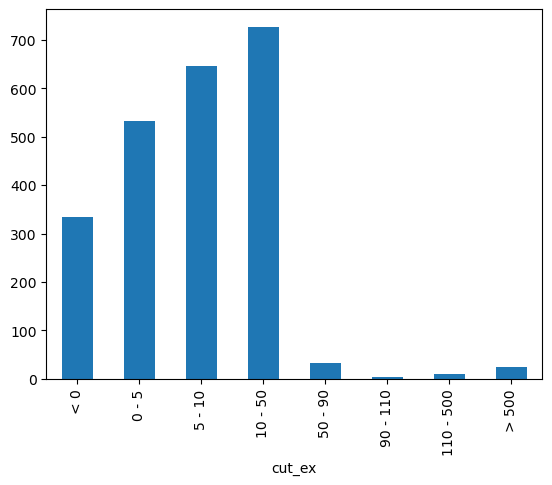

In [28]:
#Отображение диаграммы количество облигаций по категориям доходности
cut_ex.plot(kind='bar')

In [29]:
#Агрегированные значения по полю COUPONPERCENT
df1[['COUPONPERCENT', 'cut_ex']].groupby('cut_ex', dropna=False).agg(['mean','min','max','count'])

COUPONPERCENT                  
                   mean   min   max count
cut_ex                                   
< 0            7.383933  0.01  21.1   330
0 - 5          6.872350  0.01  20.0   532
5 - 10         7.347768  0.01  24.0   646
10 - 50        5.386655  0.01  24.0   722
50 - 90        4.787645  0.01  25.0    31
90 - 110       5.190000  0.51   8.5     4
110 - 500      6.650000  0.10  16.0    11
> 500          8.362500  0.10  15.0    24

<AxesSubplot:xlabel='COUPONPERCENT'>

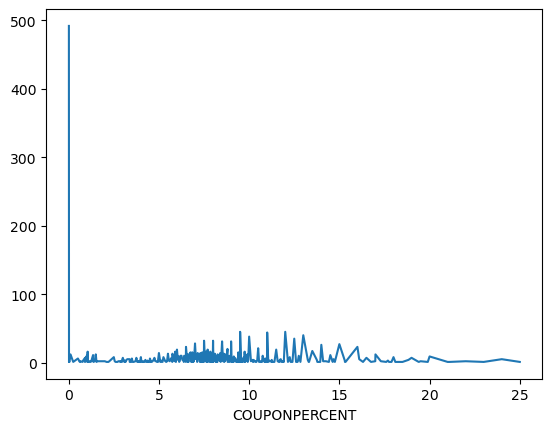

In [30]:
#Отображение графика количества облигаций по Ставки купона в % 
cut_ex1 = df1.groupby('COUPONPERCENT', dropna=False).count()['SECID']
cut_ex1.plot()

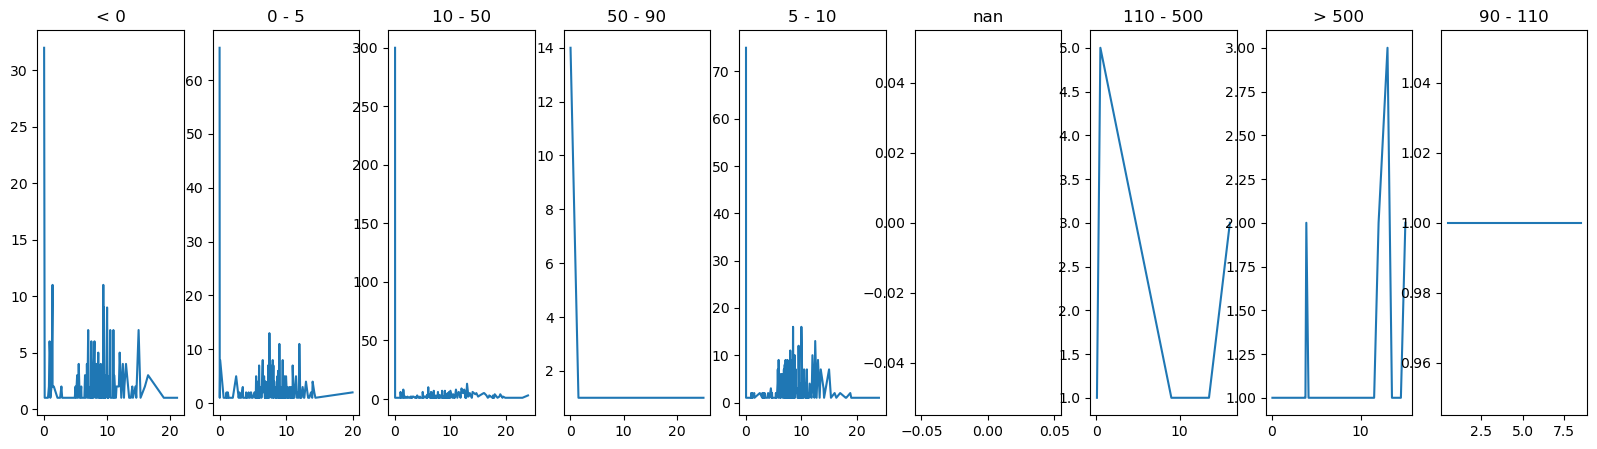

In [31]:
#Отображение графиков количества облигаций по Ставки купона в % сгруппированных по cut_ex
fig, axes = plt.subplots(1, len(df1['cut_ex'].unique()), figsize=(20, 5))
for i in range(len(df1['cut_ex'].unique())):
    title = df1['cut_ex'].unique()[i]
    #df1.groupby('COUPONPERCENT', dropna=False).count()['SECID']
    x = df1[df1['cut_ex'] == title].groupby('COUPONPERCENT', dropna=False).count()['SECID']
    axes[i].plot(x)
    axes[i].set_title(title)

Выводы:
1. Анализируя категории cut_ex, делаем вывод, чем больше доходность облигации, тем больше разница между номинальной стоимостью и котировкой(ценой последней продажи облигации)
2. На отрицательную доходность облигации влияет также номинальная стоимость и котировка. Котировка в категории '< 0' выше номинальной стоимости.
3. Также на доходность облигаций влияет COUPONPERCENT - Ставка купона, %. Она варируется от 0.01 - до 25 %

In [33]:
#2 задание
#определение облигаций с датой промежуточной выплаты по купонам не более 20% купонного периода назад
#до текущей даты и облигациям выпущенным в аналогичный период
date2 = df1[(df1['FACEUNIT'] == 'RUB') & (df1['COUPONDAYSPASSED']/df1['COUPONLENGTH'] <= 0.2)]['ISSUEDATE'].unique()
df2 = df1[df1['ISSUEDATE'].isin(date2)]

In [34]:
#рассчет доходности последующих купонов по отобранным облигациям с учетом разницы номинала и цены продажи, 
#а также с учетом налоговых отчислений на период год с текущей дата
df2['PROFIT2'] = np.where(df2['MATDATE'].dt.date < today + timedelta(days=365),
                          
                          
                                np.where((df2['FACEVALUE_RUB'] - df2['PRICE_RUB']) <= 0,
                                         100*(0.87 * df2['COUPONVALUE_RUB'] * df2['D2'] - df2['NKD_RUB'] +(df2['FACEVALUE_RUB'] - df2['PRICE_RUB']))/((df2['PRICE_RUB']+df2['NKD_RUB'])*(1+0.06/100+0.0125/100)),
                                         100*(0.87 * df2['COUPONVALUE_RUB'] * df2['D2'] - df2['NKD_RUB'] + 0.87 * (df2['FACEVALUE_RUB'] - df2['PRICE_RUB']))/((df2['PRICE_RUB']+df2['NKD_RUB'])*(1+0.06/100+0.0125/100))),
                          
                          
                                np.where((df2['FACEVALUE_RUB'] - df2['PRICE_RUB']) <= 0,
                                         100*(0.87 * df2['COUPONVALUE_RUB'] * df2['COUPONFREQUENCY'] - df2['NKD_RUB'] +(df2['FACEVALUE_RUB'] - df2['PRICE_RUB']))/((df2['PRICE_RUB']+df2['NKD_RUB'])*(1+0.06/100+0.0125/100)),
                                        100*(0.87 * df2['COUPONVALUE_RUB'] * df2['COUPONFREQUENCY'] - df2['NKD_RUB'] + 0.87 * (df2['FACEVALUE_RUB'] - df2['PRICE_RUB']))/((df2['PRICE_RUB']+df2['NKD_RUB'])*(1+0.06/100+0.0125/100))))

In [35]:
print('min -> ',df2['PROFIT2'].min())
print('max -> ',df2['PROFIT2'].max())

min ->  -38.46715619441486
max ->  1737.5063547742977


In [36]:
#разделение на кластеры по купонной доходности
cut_labels_7 = ['< 0', '0 - 5', '5 - 10', '10 - 50', '50 - 90', '90 - 110', '110 - 500', '> 500']
cut_bins = [-100, 0, 5, 10, 50, 90, 110, 500, 5000]

df2['cut_ex2'] = pd.cut(df2['PROFIT2'], bins=cut_bins, labels=cut_labels_7)

In [37]:
#Подсчет количества облигаций по категории доходности
cut_ex2 = df2.groupby('cut_ex2', dropna=False).count()['SECID']
cut_ex2

cut_ex2
< 0           55
0 - 5        110
5 - 10       226
10 - 50      247
50 - 90       14
90 - 110       0
110 - 500      2
> 500         10
Name: SECID, dtype: int64

<AxesSubplot:xlabel='cut_ex2'>

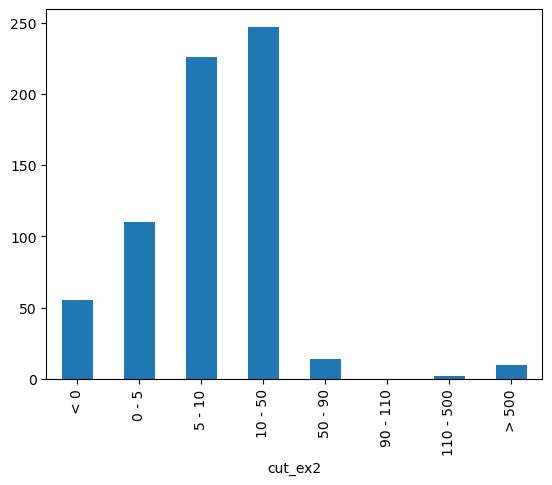

In [38]:
#Отображение диаграммы количество облигаций по категориям доходности
cut_ex2.plot(kind='bar')

In [41]:
#отображение таблицы
df2[['SECID', 'NAME', 'FACEUNIT', 'COUPONFREQUENCY', 'COUPONDATE', 'COUPONPERCENT', 
'COUPONDAYSPASSED', 'COUPONLENGTH', 'EMITENTNAME', 'PRICE_RUB', 'ISSUEDATE', 'MATDATE',
'FACEVALUE_RUB', 'NKD_RUB', 'COUPONVALUE_RUB', 'PROFIT2', 'cut_ex2']]

,SECID,NAME,FACEUNIT,COUPONFREQUENCY,COUPONDATE,COUPONPERCENT,COUPONDAYSPASSED,COUPONLENGTH,EMITENTNAME,PRICE_RUB,ISSUEDATE,MATDATE,FACEVALUE_RUB,NKD_RUB,COUPONVALUE_RUB,PROFIT2,cut_ex2
0,AMUNIBB2AER2,UNIBANK OJSC Series 1,USD,4.0,2022-11-15,5.25,90.0,92.0,"""UNIBANK"" OPENED JOINT STOCK COMPANY",6039.26,15.11.2019,2022-11-15,6021.790,77.317820,79.035994,-1.548564,< 0
16,RU000A0JR4U9,Главная дорога АО об.сер. 03,RUB,1.0,2023-11-06,16.99,6.0,364.0,"Акционерное общество ""Главная дорога""",707.29,22.11.2010,2028-10-30,750.000,2.094725,127.080000,20.513139,10 - 50
27,RU000A0JS6M0,РОСБАНК ПАО обл. БО-05,RUB,2.0,2023-04-21,6.75,23.0,182.0,Публичное акционерное общество РОСБАНК,987.74,21.10.2013,2023-10-21,1000.000,4.253736,33.660000,6.545786,5 - 10
29,RU000A0JS934,Евразийский банк развития 11,RUB,2.0,2023-01-27,7.35,107.0,182.0,Евразийский банк развития,1009.35,02.02.2018,2025-01-24,1000.000,21.546978,36.650000,3.186565,0 - 5
36,RU000A0JT7T2,ФСК Россети(ПАО)-обл. сер.21,RUB,2.0,2023-04-12,7.40,32.0,182.0,"Публичное акционерное общество ""Федеральная се...",994.79,24.10.2012,2027-10-06,1000.000,6.487912,36.900000,6.212630,5 - 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,XS2413860409,BCS SP Plc Series 231,USD,4.0,2023-01-01,NaN,43.0,92.0,BrokerCreditService Structured Products Plc,57918.67,25.11.2021,2025-04-01,75272.375,NaN,NaN,NaN,NaN
2638,XS2416961386,BCS SP Plc Series 232,USD,4.0,2022-12-08,NaN,66.0,91.0,BrokerCreditService Structured Products Plc,75287.50,30.11.2021,2024-12-08,75272.375,NaN,NaN,NaN,NaN
2641,XS2417684813,BCS SP Plc Series 233,USD,4.0,2022-12-08,NaN,66.0,91.0,BrokerCreditService Structured Products Plc,75287.50,30.11.2021,2023-12-08,75272.375,NaN,NaN,NaN,NaN
2645,XS2423361190,BCS SP Plc Series 240,USD,4.0,2022-11-28,NaN,75.0,90.0,BrokerCreditService Structured Products Plc,75219.74,27.01.2022,2027-02-28,75272.375,NaN,NaN,NaN,NaN
